<a href="https://colab.research.google.com/github/aristocrat71/Bone.ai/blob/main/models/Locator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import shutil
import os

# Create the Kaggle directory if it doesn't exist
os.makedirs('/root/.kaggle', exist_ok=True)

# Copy kaggle.json from Drive to the Kaggle directory
shutil.copy('/content/drive/My Drive/boneai/kaggle.json', '/root/.kaggle/')

'/root/.kaggle/kaggle.json'

In [4]:
os.chmod('/root/.kaggle/kaggle.json', 600)

In [5]:
!kaggle datasets download -d pkdarabi/bone-fracture-detection-computer-vision-project

Dataset URL: https://www.kaggle.com/datasets/pkdarabi/bone-fracture-detection-computer-vision-project
License(s): Attribution 4.0 International (CC BY 4.0)
bone-fracture-detection-computer-vision-project.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!rm -rf bone_fracture_data

import zipfile

with zipfile.ZipFile("bone-fracture-detection-computer-vision-project.zip", 'r') as zip_ref:
    zip_ref.extractall("bone_fracture_data")

In [7]:
!ls

bone_fracture_data				     sample_data
bone-fracture-detection-computer-vision-project.zip  yolo11n.pt
bone-fracture-seg				     yolov8s-seg.pt
drive


In [8]:
!pwd

/content


In [9]:
!cat /content/bone_fracture_data/BoneFractureYolo8/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 7
names: ['elbow positive', 'fingers positive', 'forearm fracture', 'humerus fracture', 'humerus', 'shoulder fracture', 'wrist positive']

roboflow:
  workspace: veda
  project: bone-fracture-detection-daoon
  version: 4
  license: CC BY 4.0
  url: https://universe.roboflow.com/veda/bone-fracture-detection-daoon/dataset/4

In [10]:
# import os
# os.listdir("bone_fracture_data")

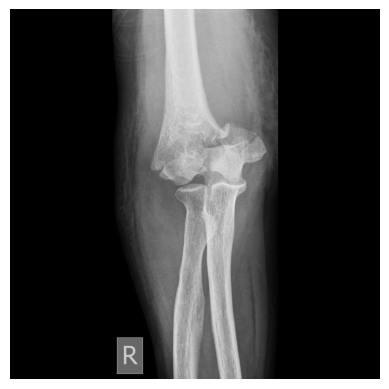

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(r"/content/bone_fracture_data/BoneFractureYolo8/train/images/distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [12]:
import cv2
import numpy as np

#img
image_path = '/content/bone_fracture_data/BoneFractureYolo8/train/images/distal-humeral-fractures-2-_JPEG.rf.525ce876785d0fd798ec3af1593e5bc1.jpg'
image = cv2.imread(image_path)
h, w, _ = image.shape

# label file
with open('/content/bone_fracture_data/BoneFractureYolo8/train/labels/distal-humeral-fractures-2-_JPEG.rf.525ce876785d0fd798ec3af1593e5bc1.txt', 'r') as f:
    line = f.readline().strip().split()
    class_id = int(line[0])
    coords = list(map(float, line[1:]))

points = []
for i in range(0, len(coords), 2):
    x = int(coords[i] * w)
    y = int(coords[i+1] * h)
    points.append([x, y])

points = np.array([points], dtype=np.int32)

# Draw the polygon
annotated_image = cv2.polylines(image, points, isClosed=True, color=(0, 0, 255), thickness=2)

# Save or display the result
#cv2.imwrite('annotated_img1.png', annotated_image)
# Or to display:
#cv2.imshow('Annotated', annotated_image)

In [13]:
#!pip install ultralytics

In [14]:
# from ultralytics import YOLO

# # Load model
# model = YOLO("yolov8n.pt")  # or yolov8s.pt, yolov8m.pt for bigger models

# # Train
# model.train(data="/content/bone_fracture_data/BoneFractureYolo8/data.yaml", epochs=50, imgsz=640)

In [15]:
# metrics = model.val()
# metrics

In [16]:
# results = model.predict(source="/content/bone_fracture_data/BoneFractureYolo8/valid/images", conf=0.25)
# results[0].show()  # Display with bounding boxes


In [17]:
# img = Image.open(r"/content/bone_fracture_data/BoneFractureYolo8/valid/images/image1_0_png.rf.d29cab92b154a83ca5bf7e40083673a2.jpg")
# plt.imshow(img)
# plt.axis("off")
# plt.show()

In [18]:
# results[1].show()

In [23]:
!pip install ultralytics
!pip install opencv-python-headless

Checking yaml is pointing to the same data.

In [20]:
# Path to the data.yaml file
yaml_path = r'/content/bone_fracture_data/BoneFractureYolo8/data.yaml'

# Check YAML content
with open(yaml_path, 'r') as file:
    content = file.read()
    print(content)

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 7
names: ['elbow positive', 'fingers positive', 'forearm fracture', 'humerus fracture', 'humerus', 'shoulder fracture', 'wrist positive']

roboflow:
  workspace: veda
  project: bone-fracture-detection-daoon
  version: 4
  license: CC BY 4.0
  url: https://universe.roboflow.com/veda/bone-fracture-detection-daoon/dataset/4


In [21]:
# Example: Correcting data.yaml paths
data_yaml_content = """
path: /content/bone_fracture_data/BoneFractureYolo8
train: /content/bone_fracture_data/BoneFractureYolo8/train/images
val: /content/bone_fracture_data/BoneFractureYolo8/valid/images
nc: 7
names: ['elbow positive', 'fingers positive', 'forearm fracture', 'humerus fracture', 'humerus', 'shoulder fracture', 'wrist positive']
"""

with open(yaml_path, 'w') as file:
    file.write(data_yaml_content)

print("Updated data.yaml file successfully.")


Updated data.yaml file successfully.


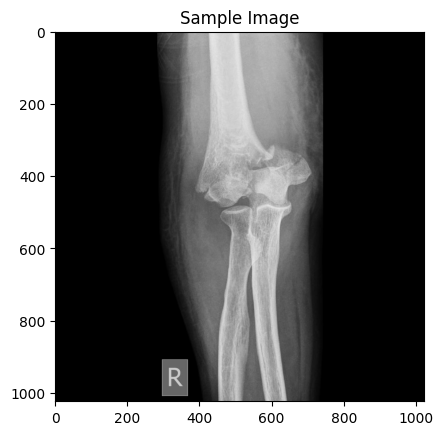

Label Content:
 0 0.35585933923721313 0.3968750014901161 0.4525467435362568 0.3829741733292004 0.4556711770844495 0.47362547689055823 0.3681857266505504 0.48925501404327343


In [22]:
import cv2
import matplotlib.pyplot as plt

# Sample image and label paths
sample_img_path = '/content/bone_fracture_data/BoneFractureYolo8/train/images/distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.jpg'
sample_label_path = '/content/bone_fracture_data/BoneFractureYolo8/train/labels/distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.txt'

# Display Image
img = cv2.imread(sample_img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Sample Image")
plt.show()

# Display Label File Content
with open(sample_label_path, 'r') as file:
    label_content = file.read()
    print("Label Content:\n", label_content)


Sample training with smaller epochs

In [24]:
from ultralytics import YOLO

# Load the model
model = YOLO('yolov8s-seg.pt')

# Train the model with early stopping
# model.train(
#     data=yaml_path,
#     epochs=10,
#     imgsz=640,
#     batch=15,
#     project='bone-fracture-seg',
#     name='yolov8-seg',
#     cache='disk',
#     patience=3  # Early stopping if no improvement for 10 consecutive epochs
# )

#)))))))))) (useless)

Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=15, bgr=0.0, box=7.5, cache=disk, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/bone_fracture_data/BoneFractureYolo8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8-seg3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=3, perspective=0.0,

train: Scanning /content/bone_fracture_data/BoneFractureYolo8/train/labels... 3631 images, 1827 backgrounds, 0 corrupt: 100%|██████████| 3631/3631 [00:01<00:00, 2679.04it/s]

train: New cache created: /content/bone_fracture_data/BoneFractureYolo8/train/labels.cache



train: Caching images (2.0GB Disk): 100%|██████████| 3631/3631 [00:09<00:00, 396.21it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 284.9±144.9 MB/s, size: 13.3 KB)


val: Scanning /content/bone_fracture_data/BoneFractureYolo8/valid/labels... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<00:00, 1598.35it/s]

val: New cache created: /content/bone_fracture_data/BoneFractureYolo8/valid/labels.cache



val: Caching images (0.2GB Disk): 100%|██████████| 348/348 [00:01<00:00, 317.64it/s]


Plotting labels to bone-fracture-seg/yolov8-seg3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.00046875), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to bone-fracture-seg/yolov8-seg3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.18G      2.784      4.513      10.01      2.609          0        640: 100%|██████████| 243/243 [01:29<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.41it/s]

                   all        348        204      0.529    0.00775    0.00678    0.00231      0.529    0.00775    0.00667     0.0019



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      5.61G      2.622      4.226      4.547      2.561          0        640: 100%|██████████| 243/243 [01:23<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.94it/s]


                   all        348        204      0.674     0.0216     0.0151    0.00448      0.686      0.022     0.0107    0.00267

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      5.64G      2.537      4.127      4.207      2.474          0        640: 100%|██████████| 243/243 [01:23<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.37it/s]


                   all        348        204      0.353     0.0231     0.0243    0.00864      0.356     0.0178     0.0187    0.00535

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10       5.7G      2.448      4.076      3.966      2.463          0        640: 100%|██████████| 243/243 [01:23<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.43it/s]


                   all        348        204      0.547     0.0572     0.0441     0.0151      0.742     0.0419     0.0468     0.0131

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      5.73G      2.388      3.915      3.603      2.435          0        640: 100%|██████████| 243/243 [01:22<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.38it/s]


                   all        348        204      0.449      0.116     0.0926     0.0303      0.444     0.0947     0.0752     0.0267

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      5.77G      2.297      3.771      3.409       2.34          0        640: 100%|██████████| 243/243 [01:26<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.73it/s]

                   all        348        204      0.271       0.15      0.122     0.0445      0.253      0.132      0.106     0.0357



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10       5.8G      2.254      3.665      3.125      2.292          1        640: 100%|██████████| 243/243 [01:23<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.15it/s]


                   all        348        204      0.277      0.199      0.138     0.0511      0.283      0.197      0.134     0.0415

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      5.85G      2.158      3.486      2.868       2.24          0        640: 100%|██████████| 243/243 [01:23<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.47it/s]


                   all        348        204      0.379      0.205      0.171     0.0728       0.37      0.183      0.152     0.0566

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      5.89G      2.071      3.386      2.687      2.162          1        640: 100%|██████████| 243/243 [01:23<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.46it/s]


                   all        348        204      0.242      0.232      0.184     0.0657      0.249      0.233      0.175     0.0593

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      5.93G      1.997      3.252      2.481      2.084          0        640: 100%|██████████| 243/243 [01:23<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.43it/s]


                   all        348        204      0.208      0.262      0.193     0.0758       0.24      0.268      0.189     0.0655

10 epochs completed in 0.247 hours.
Optimizer stripped from bone-fracture-seg/yolov8-seg3/weights/last.pt, 23.8MB
Optimizer stripped from bone-fracture-seg/yolov8-seg3/weights/best.pt, 23.8MB

Validating bone-fracture-seg/yolov8-seg3/weights/best.pt...
Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,782,309 parameters, 0 gradients, 42.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/12 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   8%|▊         | 1/12 [00:00<00:04,  2.21it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  17%|█▋        | 2/12 [00:01<00:07,  1.32it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.42it/s]


                   all        348        204      0.208      0.262      0.193     0.0757       0.24      0.263      0.189     0.0655
        elbow positive         28         29      0.176      0.069      0.083     0.0371      0.188      0.069     0.0813     0.0312
      fingers positive         41         48      0.344      0.208      0.211     0.0598      0.336      0.188      0.187     0.0567
      forearm fracture         37         43      0.221      0.465      0.321      0.155      0.234      0.488      0.326       0.15
               humerus         31         36      0.377      0.528      0.407      0.162      0.375        0.5       0.39       0.12
     shoulder fracture         19         20      0.132        0.3     0.0949     0.0294      0.136        0.3      0.101     0.0236
        wrist positive         17         28          0          0     0.0383     0.0102       0.17     0.0357     0.0474      0.011
Speed: 0.4ms preprocess, 5.3ms inference, 0.0ms loss, 4.9ms postproce

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7db5764042d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004

In [31]:
# Path to the trained model weights
weights_path = '/content/bone-fracture-seg/yolov8-seg3/weights/best.pt'

# Load the model
model = YOLO(weights_path)

# Perform inference
results = model('/content/bone_fracture_data/BoneFractureYolo8/test/images/distal-humerus-fracture-1_jpg.rf.831cb137cfcbde1079f86abd5f5f2867.jpg')

# Save the result with red annotations
results[0].save('/content/bone_fracture_data/BoneFractureYolo8/annotated_image.jpg')


image 1/1 /content/bone_fracture_data/BoneFractureYolo8/test/images/distal-humerus-fracture-1_jpg.rf.831cb137cfcbde1079f86abd5f5f2867.jpg: 640x256 (no detections), 12.4ms
Speed: 2.5ms preprocess, 12.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 256)


'/content/bone_fracture_data/BoneFractureYolo8/annotated_image.jpg'

In [33]:
print(results[0].boxes)
print(results[0].masks)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([], device='cuda:0')
conf: tensor([], device='cuda:0')
data: tensor([], device='cuda:0', size=(0, 6))
id: None
is_track: False
orig_shape: (2048, 801)
shape: torch.Size([0, 6])
xywh: tensor([], device='cuda:0', size=(0, 4))
xywhn: tensor([], device='cuda:0', size=(0, 4))
xyxy: tensor([], device='cuda:0', size=(0, 4))
xyxyn: tensor([], device='cuda:0', size=(0, 4))
None


In [34]:
# Perform inference with a lower confidence threshold
results = model('/content/bone_fracture_data/BoneFractureYolo8/test/images/distal-humerus-fracture-1_jpg.rf.831cb137cfcbde1079f86abd5f5f2867.jpg', conf=0.25)

# Save the result
results[0].save('/content/bone_fracture_data/BoneFractureYolo8/annotated_image_low_conf.jpg')


image 1/1 /content/bone_fracture_data/BoneFractureYolo8/test/images/distal-humerus-fracture-1_jpg.rf.831cb137cfcbde1079f86abd5f5f2867.jpg: 640x256 (no detections), 12.1ms
Speed: 2.6ms preprocess, 12.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 256)


'/content/bone_fracture_data/BoneFractureYolo8/annotated_image_low_conf.jpg'

In [35]:
# Path to the label file (adjust the filename as needed)
label_path = '/content/bone_fracture_data/BoneFractureYolo8/test/labels/distal-humerus-fracture-1_jpg.rf.831cb137cfcbde1079f86abd5f5f2867.txt'

with open(label_path, 'r') as file:
    content = file.readlines()
    print("Label Content:\n", content)

Label Content:
 ['0 0.6152863395755306 0.5138672001953125 0.7841187365792759 0.5088813100585937 0.780933265917603 0.436586189453125 0.5902154282147316 0.434890966796875 0.6152863395755306 0.5138672001953125']


In [36]:
import cv2
import numpy as np

# Load the image
image_path = '/content/bone_fracture_data/BoneFractureYolo8/test/images/distal-humerus-fracture-1_jpg.rf.831cb137cfcbde1079f86abd5f5f2867.jpg'
image = cv2.imread(image_path)
h, w, _ = image.shape

# Load the label file
with open(label_path, 'r') as f:
    line = f.readline().strip().split()
    class_id = int(line[0])
    coords = list(map(float, line[1:]))

# Convert normalized coordinates to absolute pixel values
points = []
for i in range(0, len(coords), 2):
    x = int(coords[i] * w)
    y = int(coords[i+1] * h)
    points.append([x, y])

points = np.array([points], dtype=np.int32)

# Draw the polygon
annotated_image = cv2.polylines(image, points, isClosed=True, color=(0, 0, 255), thickness=2)

# Save or display the result
cv2.imwrite('testannotate.png', annotated_image)
# Or to display:
# cv2.imshow('Annotated', annotated_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

True

In [37]:
!cat /content/bone-fracture-seg/yolov8-seg3/results.txt

cat: /content/bone-fracture-seg/yolov8-seg3/results.txt: No such file or directory


In [39]:
from ultralytics import YOLO

# Load the model
model = YOLO('yolov8s-seg.pt')

# Train the model with early stopping
# model.train(
#     data=yaml_path,
#     epochs=55,  # Increased epochs
#     imgsz=960,  # Increased resolution for better fracture detection
#     batch=15,
#     project='bone-fracture-seg',
#     name='yolov8-seg',
#     cache='disk',
#     patience=5  # Early stopping patience
# )

#1hr 35mins

In [40]:
results = model('/content/bone_fracture_data/BoneFractureYolo8/test/images/distal-humerus-fracture-1_jpg.rf.831cb137cfcbde1079f86abd5f5f2867.jpg')

results[0].boxes


image 1/1 /content/bone_fracture_data/BoneFractureYolo8/test/images/distal-humerus-fracture-1_jpg.rf.831cb137cfcbde1079f86abd5f5f2867.jpg: 640x256 1 vase, 37.8ms
Speed: 5.7ms preprocess, 37.8ms inference, 53.4ms postprocess per image at shape (1, 3, 640, 256)


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([75.], device='cuda:0')
conf: tensor([0.6442], device='cuda:0')
data: tensor([[1.1789e+02, 8.9395e+00, 6.0257e+02, 2.0066e+03, 6.4421e-01, 7.5000e+01]], device='cuda:0')
id: None
is_track: False
orig_shape: (2048, 801)
shape: torch.Size([1, 6])
xywh: tensor([[ 360.2293, 1007.7927,  484.6722, 1997.7064]], device='cuda:0')
xywhn: tensor([[0.4497, 0.4921, 0.6051, 0.9754]], device='cuda:0')
xyxy: tensor([[ 117.8933,    8.9395,  602.5654, 2006.6459]], device='cuda:0')
xyxyn: tensor([[0.1472, 0.0044, 0.7523, 0.9798]], device='cuda:0')

In [41]:
results[0].save('/content/bone_fracture_data/BoneFractureYolo8/annotated_image_seg4.jpg')

'/content/bone_fracture_data/BoneFractureYolo8/annotated_image_seg4.jpg'

**THE MODEL DETECTS BONE**

HIGHLIGHT:

Finally the model gives an output. It is able to identify the core part of the entire bone.